In [1]:
!pip install yfinance

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 3.8 MB/s eta 0:00:01
     -- ------------------------------------- 0.2/3.0 MB 4.1 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/3.0 MB 3.5 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/3.0 MB 3.7 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 3.9 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 3.7 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 3.9 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 3.9 MB/s eta 0:00:01
     ----------------- ---------

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data= yf.download('AAPL', start='2010-01-01', end='2024-06-14')

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378823,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800
...,...,...,...,...,...,...
2024-06-07,194.649994,196.940002,194.139999,196.889999,196.889999,53103900
2024-06-10,196.899994,197.300003,192.149994,193.119995,193.119995,97262100
2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300


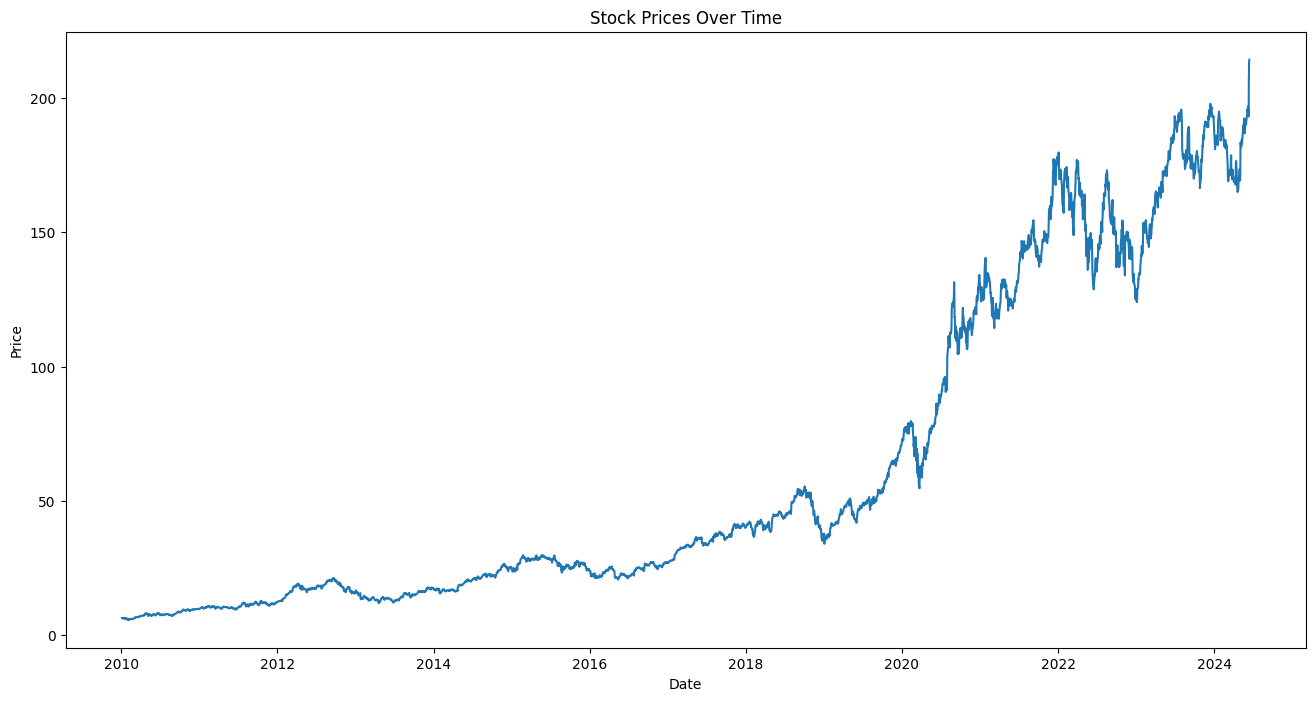

In [6]:
#visualizza the historical stock prices
plt.figure(figsize=(16, 8))
plt.plot(data['Adj Close'])#plotting the adjusted closing price
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [7]:
df=data.reset_index() #le date divebntano una colonna regolare del dataframe
df=df[['Date','Close']] #seleziono solo le colonne che mi interessano
df=df.rename(columns={'Date':'ds','Close':'y'}) #rinomino le colonne per usare il modello prophet

In [8]:
df

,ds,y
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714
...,...,...
3631,2024-06-07,196.889999
3632,2024-06-10,193.119995
3633,2024-06-11,207.149994
3634,2024-06-12,213.070007


In [9]:
!pip install prophet

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 4.3 MB/s eta 0:00:04
   - -------------------------------------- 0.3/13.3 MB 4.2 MB/s eta 0:00:04
   - -------------------------------------- 0.5/13.3 MB 4.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/13.3 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/13.3 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/13.3 MB 4.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/13.3 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/13.3 MB 4.3 MB/s eta 0:00:03
   --

In [21]:
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [22]:
m=Prophet()

In [23]:
m.fit(df)

11:40:26 - cmdstanpy - INFO - Chain [1] start processing
11:40:27 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
futuro = m.make_future_dataframe(periods=365) #aggiungo 365 giorni al mio dataframe

In [25]:
forecast=m.predict(futuro)

In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,6.980818,-1.801732,16.336379,6.980818,6.980818,0.010823,0.010823,0.010823,-0.049423,-0.049423,-0.049423,0.060246,0.060246,0.060246,0.0,0.0,0.0,6.991641
1,2010-01-05,6.994135,-2.764443,16.155906,6.994135,6.994135,-0.126880,-0.126880,-0.126880,-0.122630,-0.122630,-0.122630,-0.004250,-0.004250,-0.004250,0.0,0.0,0.0,6.867255
2,2010-01-06,7.007452,-2.459823,16.201519,7.007452,7.007452,-0.157529,-0.157529,-0.157529,-0.091991,-0.091991,-0.091991,-0.065538,-0.065538,-0.065538,0.0,0.0,0.0,6.849923
3,2010-01-07,7.020769,-2.145445,15.683032,7.020769,7.020769,-0.259397,-0.259397,-0.259397,-0.136493,-0.136493,-0.136493,-0.122904,-0.122904,-0.122904,0.0,0.0,0.0,6.761372
4,2010-01-08,7.034086,-2.635823,15.917056,7.034086,7.034086,-0.417866,-0.417866,-0.417866,-0.242249,-0.242249,-0.242249,-0.175617,-0.175617,-0.175617,0.0,0.0,0.0,6.616220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2025-06-09,199.689937,186.396383,210.895883,193.586788,206.288061,-1.017350,-1.017350,-1.017350,-0.049423,-0.049423,-0.049423,-0.967927,-0.967927,-0.967927,0.0,0.0,0.0,198.672587
3997,2025-06-10,199.729261,186.958583,210.262434,193.610924,206.363014,-1.091623,-1.091623,-1.091623,-0.122630,-0.122630,-0.122630,-0.968993,-0.968993,-0.968993,0.0,0.0,0.0,198.637638
3998,2025-06-11,199.768584,186.907031,209.674246,193.628589,206.437968,-1.068690,-1.068690,-1.068690,-0.091991,-0.091991,-0.091991,-0.976699,-0.976699,-0.976699,0.0,0.0,0.0,198.699894
3999,2025-06-12,199.807908,187.463912,209.317811,193.643541,206.512922,-1.127067,-1.127067,-1.127067,-0.136493,-0.136493,-0.136493,-0.990573,-0.990573,-0.990573,0.0,0.0,0.0,198.680841


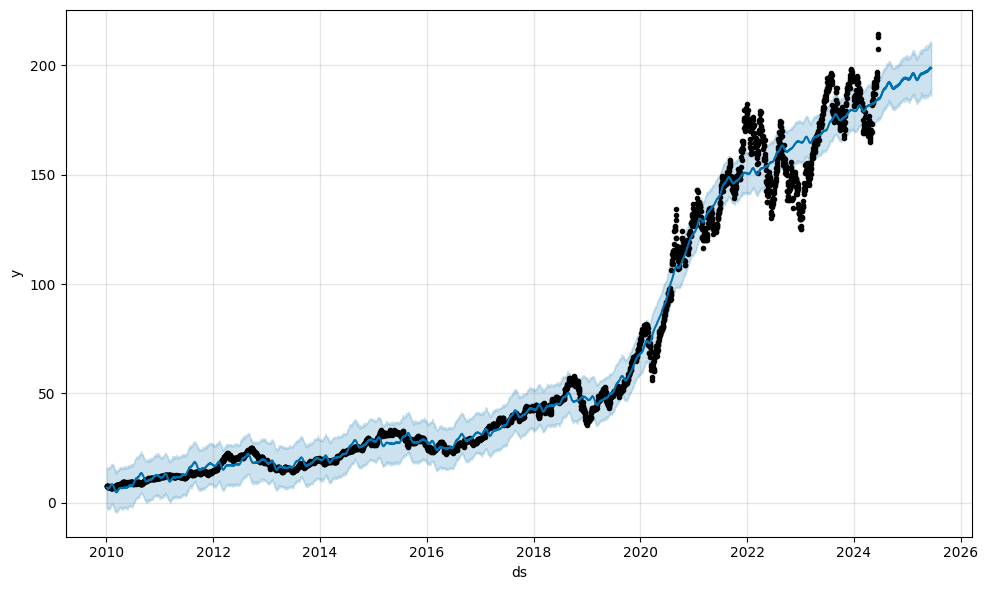

In [27]:
fig1 = m.plot(forecast)

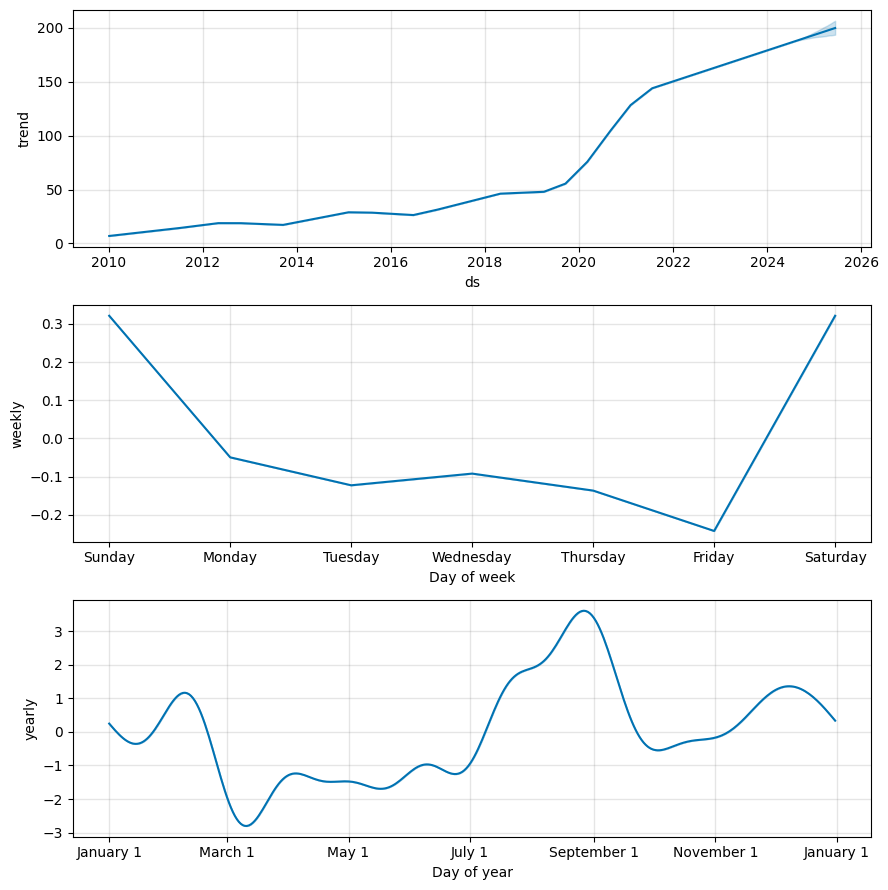

In [32]:
fig2=m.plot_components(forecast)

In [34]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv=cross_validation(m, horizon='365 days', parallel="processes")
df_p=performance_metrics(df_cv, rolling_window=1)


In [35]:
df_p['rmse'].values[0]#sta sbagliando di 21 unita

21.448106416765004